In [1]:
#Make the importations first of all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image #To be able to display images in the notebook

# Importing data
We will import the necessary data to make the joins:
* The **athlete** dataset with information of the athlete, age, year when won the Olympic medal and which type of medal
* The **country** from which the athlete is
* The **sports** that the athlete played

So having this datasets, we can joing them in order to obtain a final dataset that contains all the information

As we will see, there is different ways to join those datasets

In [16]:
#Now going to import the dataset
filepath = "datasets/athletes/"
data = pd.read_csv(filepath + "Medals.csv", encoding="ISO-8859-1")
data

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6
...,...,...,...,...,...,...,...,...
8613,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1
8614,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1
8615,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1
8616,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1


In [23]:
#We might want a list of the unique athletes
names = data["Athlete"].unique().tolist()
names

['Michael Phelps',
 'Natalie Coughlin',
 'Aleksey Nemov',
 'Alicia Coutts',
 'Missy Franklin',
 'Ryan Lochte',
 'Allison Schmitt',
 'Ian Thorpe',
 'Dara Torres',
 'Cindy Klassen',
 'Nastia Liukin',
 'Marit Bjørgen',
 'Sun Yang',
 'Kirsty Coventry',
 'Libby Lenton-Trickett',
 'Inge de Bruijn',
 'Petria Thomas',
 'Gary Hall Jr.',
 'Michael Klim',
 "Susie O'Neill",
 'Jenny Thompson',
 'Pieter van den Hoogenband',
 'An Hyeon-Su',
 'Aliya Mustafina',
 'Shawn Johnson',
 'Dmitry Sautin',
 'Leontien Zijlaard-van Moorsel',
 'Petter Northug Jr.',
 'Ole Einar Bjørndalen',
 'Janica Kostelic',
 'Nathan Adrian',
 'Yannick Agnel',
 'Brittany Elmslie',
 'Matt Grevers',
 'Ryosuke Irie',
 'Cullen Jones',
 'Ranomi Kromowidjojo',
 'Camille Muffat',
 'Mel Schlanger',
 'Emily Seebohm',
 'Rebecca Soni',
 'Satomi Suzuki',
 'Dana Vollmer',
 'Alain Bernard',
 'László Cseh Jr.',
 'Margaret Hoelzer',
 'Katie Hoff',
 'Leisel Jones',
 'Kosuke Kitajima',
 'Andrew Lauterstein',
 'Jason Lezak',
 'Pang Jiaying',
 'Aaro

In [14]:
#We also want to import the list of the countries
countries = pd.read_csv(filepath + "Countries.csv", encoding = "ISO-8859-1")
countries

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
...,...,...
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany


In [15]:
#As well as the sports that they play
sports = pd.read_csv(filepath + "Sports.csv", encoding = "ISO-8859-1")
sports

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming
...,...,...
6970,Olena Sadovnycha,Archery
6971,Kateryna Serdiuk,Archery
6972,Wietse van Alten,Archery
6973,Sandra Wagner-Sachse,Archery


We can see that the number of rows in each dataset is not the same. This can be due to:
* An athlete that have won different times the medal (f.e. Michael Phelps)
* An athlete that plays more than just one sport (f.e. Aleksandar Ciric)
* Could be that an athelte has changed of country for which it plays the Olympic games

## Solving bugs in datasets
As we said, there can be the possibility that a player has changes of country while the period the data is collected. This could give us some problemas, as it will be combined as many times as the player has been played.

For example if a player has won a gold and silver medal, and has played in US and Rusia, when the join is made it will appear:
* Gold medal in US
* Gold medal in Rusia
* Silver medal in US
* Silver medal in Rusia

So we need to handle this situation.



### Countries

In [17]:
#An example of an athlete with duplicated data
countries[countries["Athlete"]=="Aleksandar Ciric"]

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [21]:
#We will eleiminate this
countries_dp = countries.drop_duplicates(subset="Athlete")
countries_dp

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
...,...,...
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany


So now that we do not have more duplicated in the country dataset, the length of athlete names should be the same as countries_dp dataset

In [24]:
len(names) == len(countries_dp)

True

### Sports

In [27]:
#We should make the same in the sports
sports_dp = sports.drop_duplicates(subset="Athlete")
sports_dp

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming
...,...,...
6970,Olena Sadovnycha,Archery
6971,Kateryna Serdiuk,Archery
6972,Wietse van Alten,Archery
6973,Sandra Wagner-Sachse,Archery


In [28]:
len(names) == len(sports_dp)

True

# Inner join

It returns the dataframe which are shared between the two databases

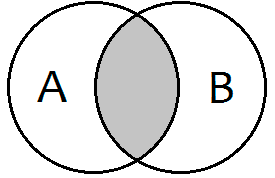

In [29]:
Image(filename="resources/inner-join.png")

To make this, we will randomly eliminate athletes from the countries and then make the join. So this way we could see that the length of the end dataset is the one with the lowest rows.

In [30]:
#Going to select randomly 6 athletes
out_athletes = np.random.choice(data["Athlete"], size=6, replace=False)

In [41]:
countries_out = countries_dp[~countries_dp["Athlete"].isin(out_athletes)] 
#Where the ~ is to make the opposed to
#Isin is to collect the athletes which have the same name
#So we would say to do not collect those countries which have the names of out_athletes


print("Length of the original: " + str(len(countries_dp)) + ". Length of the elimination one: " + str(len(countries_out)))
#We can see that now there are 6 less

Length of the original: 6956. Length of the elimination one: 6950


In [45]:
#And now we make the merge
merged_inner = pd.merge(left=data, right=countries_out, how="inner", left_on="Athlete", right_on="Athlete")
#Where we use the merge function of the Pandas
#The left refers to the dataset that will be used as A on the Image
#The right is the one of B
#The how property explains how this merge is going to be used
#The left_on refers to how will be the datasets joined in the A dataset (using the column of Athlete)
#And the right_on is the the B column that will be used to make the join to the other dataset

# Note that the value of the columns used to merge of datasets need to have similarity in order to be able to do the merge


#And we can see that the new dataframe is lower than the data, as there are eliminated athletes which have won => 1
len(merged_inner)-len(data)

-9

# Left Joint

The left joint is the one which will be done a merge with only the values that are in the left dataset.

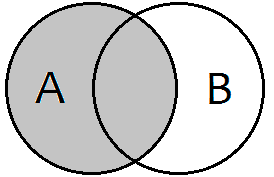

In [46]:
Image("resources/left-join.png")

In [51]:
#We will use the same datasets as before, but we will see that the new merged data has the same length as the A
merged_left = pd.merge(left=data, right=countries_out, how="left", left_on="Athlete", right_on="Athlete")
len(merged_left) == len(data)

True